

```
Must only be used when activation function is tanh.
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

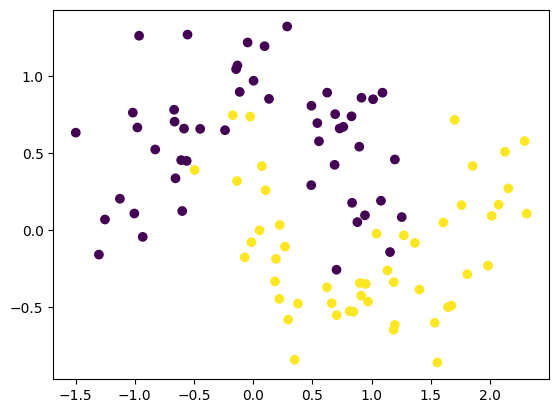

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
from tensorflow.keras.initializers import GlorotNormal

In [7]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer=GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer=GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer=GlorotNormal()))
model.add(Dense(10,activation='tanh',kernel_initializer=GlorotNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.37515268, -0.1596523 ,  0.30586118,  0.19514118,  0.25898457,
         -0.8190911 ,  0.57421166,  0.06711459,  0.758591  ,  0.7182875 ],
        [ 0.4179543 ,  0.19866805, -0.5776089 ,  0.09775552, -0.03741492,
          0.18600109, -0.49057212, -0.11736018,  0.10512479,  0.64498687]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.1977133 , -0.208793  ,  0.46496928,  0.27090397,  0.11509327,
         -0.70914173,  0.34721112,  0.02167704, -0.06519462, -0.00496451],
        [ 0.017403  ,  0.27404737,  0.45455265,  0.02041614, -0.5500016 ,
         -0.07507469, -0.187652  , -0.33518466,  0.19410494,  0.11261761],
        [-0.11653236, -0.11134458,  0.10878614,  0.22082296,  0.11567136,
          0.05068082,  0.25713593, -0.1881669 , -0.28476366, -0.13972734],
        [-0.13901949, -0.0670647 , -0.5377733 ,  0.05897756, -0.02780306,
         -0.11452053,  0.2173156 , -0.5803248 ,  0.11618305, -0.09169248],
        [-0.31962

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.3219 - loss: 0.7550 - val_accuracy: 0.2000 - val_loss: 0.7593
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3672 - loss: 0.7245 - val_accuracy: 0.2000 - val_loss: 0.7286
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3547 - loss: 0.7098 - val_accuracy: 0.4000 - val_loss: 0.7000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6187 - loss: 0.6887 - val_accuracy: 0.8500 - val_loss: 0.6738
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8375 - loss: 0.6652 - val_accuracy: 0.8500 - val_loss: 0.6503
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7516 - loss: 0.6467 - val_accuracy: 0.8000 - val_loss: 0.6280
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7336 - loss: 0.6294 - val_accuracy: 0.8000 - val_loss: 0.6067
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7258 - loss: 0.6131 - val_accuracy: 0.8000 - val_loss

In [12]:
model.get_weights()

[array([[ 0.34483537, -0.09485693,  0.29136577,  0.20502694,  0.24984914,
         -0.97556907,  0.47212216,  0.11861682,  0.8510407 ,  0.7584    ],
        [ 0.5087418 ,  0.1391874 , -0.61583793, -0.00403417, -0.15093048,
          0.1516776 , -0.59786737, -0.22392364,  0.15782677,  0.593758  ]],
       dtype=float32),
 array([-0.06541481,  0.02359779, -0.0114027 , -0.00958151, -0.00506535,
         0.08322367, -0.0183958 ,  0.01273191, -0.08468166,  0.106856  ],
       dtype=float32),
 array([[-0.06592704, -0.26322776,  0.5729161 ,  0.23967062,  0.10193115,
         -0.73651487,  0.4274887 ,  0.09327085,  0.00358221, -0.09616059],
        [ 0.12287489,  0.18459754,  0.42791817,  0.08014271, -0.50790095,
         -0.18082234, -0.12677784, -0.25239858,  0.3396383 ,  0.02834081],
        [-0.24149057, -0.01931001,  0.06969003,  0.16003028,  0.08184062,
          0.15631646,  0.18796752, -0.27602854, -0.42579272, -0.03734655],
        [-0.09051695,  0.01112877, -0.43174574, -0.01501346, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

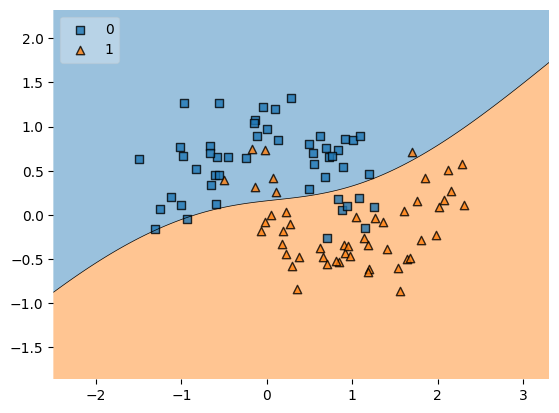

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
from tensorflow.keras.initializers import GlorotUniform

In [19]:
model2 = Sequential()

model2.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer=GlorotUniform()))
model2.add(Dense(10,activation='tanh',kernel_initializer=GlorotUniform()))
model2.add(Dense(10,activation='tanh',kernel_initializer=GlorotUniform()))
model2.add(Dense(10,activation='tanh',kernel_initializer=GlorotUniform()))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history2 = model2.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.7320 - loss: 0.6382 - val_accuracy: 0.7500 - val_loss: 0.6244
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6680 - loss: 0.6481 - val_accuracy: 0.7500 - val_loss: 0.6098
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6602 - loss: 0.6416 - val_accuracy: 0.8000 - val_loss: 0.5948
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6797 - loss: 0.6275 - val_accuracy: 0.8000 - val_loss: 0.5801
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6812 - loss: 0.6105 - val_accuracy: 0.8000 - val_loss: 0.5660
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6695 - loss: 0.6040 - val_accuracy: 0.8000 - val_loss: 0.5521
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6500 - loss: 0.6018 - val_accuracy: 0.8500 - val_loss: 0.5382
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6734 - loss: 0.5856 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

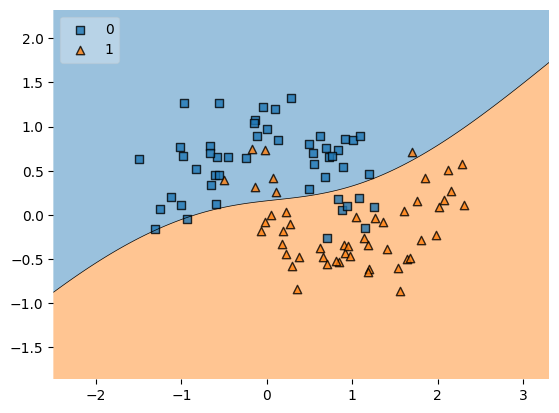

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)